In [102]:
import numpy as np

x = np.array([[1, 2, 3],
              [4, 5, 6]])

print(x * 2)

[[ 2  4  6]
 [ 8 10 12]]


In [103]:
from scipy import sparse
eye = np.eye(4)
print(f"NumPy array: {eye}")

NumPy array: [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


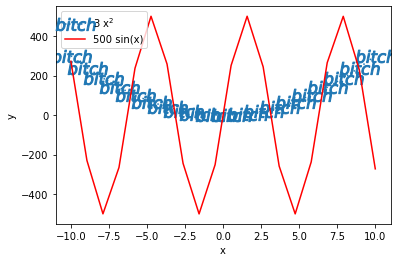

In [104]:
import matplotlib.pyplot as plt

x = np.linspace(-10,10,20)
y = 3 * x ** 2

y2 = 500 * np.sin(x)

plt.plot(x, y, marker='$bitch$', markersize=40, linestyle=':', label='3 x$^2$')
plt.plot(x,y2,"r", label='500 sin(x)')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')

plt.savefig('test_1.png', dpi=400)

In [105]:
import pandas as pd
from functools import reduce

data = pd.read_csv('./data_0.csv')
# final_df = reduce(lambda  left,right: pd.merge(left,right,on=['name'],
#                                             how='outer'), [data, data, data])

display(data[data.age > 80])

,name,age,height,weight,location
0,trump,86,190,250,NY
1,joe,89,190,150,DC


In [106]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print ("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))
# print (f"Keys: \n{iris_dataset.keys()}")
print(iris_dataset['target_names'])
print(iris_dataset['feature_names'])
print(type(iris_dataset))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
<class 'sklearn.utils.Bunch'>


Here every key is extracted by a string inside '' from a dictionary

- `()` is for functions
- `''` is for strings
- `[]` is for lists

```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=1
)
print(f'train set y shape {y_train.shape}')
```

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0
)
print(f'train set y shape {y_train.shape}')

train set y shape (112,)


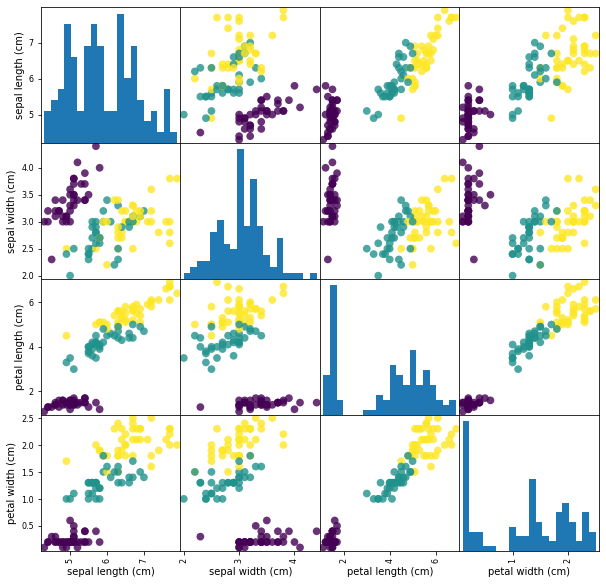

In [108]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(10,10), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)

now import a ML model to classify the 3 colors, rename the model to specify

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Here the model is trained with train dataset

- [[number]] is a vertical matrix

- "" is text, {} inside "" is a variable



In [110]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print(f"X_new shape:{X_new.shape}")

prediction = knn.predict(X_new)
print(iris_dataset['target_names'][prediction])

X_new shape:(1, 4)
['setosa']


now test the model with test dataset

In [116]:
y_pred = knn.predict(X_test)
print(f"Test set predictions: \n {iris_dataset['target_names'][y_pred]}")

print (f"Test set score: {knn.score(X_test, y_test):.3f}")

Test set predictions: 
 ['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica']
Test set score: 0.974


- :4`.`3f formats a float with 3 digits after `.`, and 4 digits before `.`.